<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv('Boston (1).csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# df.sort_values(by=['MEDV'], ascending=True, inplace=True)
# df.head()

### Dividing the Dataset into Training set and Test set

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling the Dataset

In [8]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# ct = make_column_transformer(
#     (MinMaxScaler(), slice(0, 13))
# )

In [9]:
# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)

## Building a Model

In [10]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 42.7328 - mae: 42.7328
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 24.6887 - mae: 24.6887
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 16.1707 - mae: 16.1707
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 13.1893 - mae: 13.1893
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 10.4339 - mae: 10.4339
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 8.5527 - mae: 8.5527
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 7.2646 - mae: 7.2646
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 6.5990 - mae: 6.5990
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 6.1025 - mae: 6.1025
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 5.8576 - mae: 5.8576
Epoch 11/100
13/13 [=============================

## Evaluating the Model

In [11]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.8139 - mae: 4.8139


[4.813906669616699, 4.813906669616699]

In [12]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [13]:
np.column_stack((y_test[:10], tf.squeeze(predicted[:10])))

array([[22.6       , 21.1379528 ],
       [50.        , 17.75137711],
       [23.        , 22.09967995],
       [ 8.3       , 13.5393362 ],
       [21.2       , 20.46647453],
       [19.9       , 23.05352592],
       [20.6       , 17.79787064],
       [18.7       , 25.36429214],
       [16.1       , 18.68633842],
       [18.6       ,  9.922719  ]])

Text(0.5, 0, 'epochs')

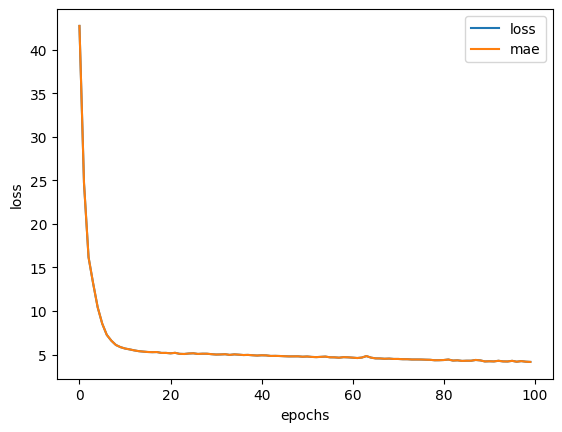

In [14]:
## Ploting the Learning curve

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')